In [18]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


In [19]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
import numpy as np

In [20]:
url = "https://raw.githubusercontent.com/Mao2003/Mao2003/main/Ielts%20result.csv"
df = pd.read_csv(url,encoding = 'unicode_escape')
pysqldf = lambda q: sqldf(q, globals())
print(df)

            id        name      month  class  speaking  listening  reading  \
0            1     JohnDeo   November   Four       7.0        7.0      6.0   
1            2     MaxRuin   November  Three       7.5        6.0      7.0   
2            3      Arnold   November  Three       6.5        7.0      7.0   
3            4   KrishStar    October   Four       6.0        7.0      6.5   
4            5    JohnMike    October   Four       7.0        7.5      7.0   
5            6    AlexJohn    October   Four       8.0        7.5      7.0   
6            7   MyJohnRob    October  Fifth       7.0        8.0      7.0   
7            8      Asruid    October   Five       8.5        8.0      7.5   
8            9      TesQry    October    Six       6.0        6.5      6.0   
9           10     BigJohn    October   Four       5.5        6.0      5.5   
10          11      Ronald    October    Six       6.0        6.0      6.0   
11          12       Recky   November    Six       7.0        6.

In [21]:
df2=pysqldf("SELECT class, speaking, listening, reading, writing, overall\
             FROM df")
print(df2)

    class  speaking  listening  reading  writing  overall
0    Four       7.0        7.0      6.0      7.0      7.0
1   Three       7.5        6.0      7.0      6.5      7.0
2   Three       6.5        7.0      7.0      6.0      6.5
3    Four       6.0        7.0      6.5      6.0      6.5
4    Four       7.0        7.5      7.0      7.0      7.0
5    Four       8.0        7.5      7.0      8.0      7.5
6   Fifth       7.0        8.0      7.0      7.0      7.5
7    Five       8.5        8.0      7.5      8.0      8.0
8     Six       6.0        6.5      6.0      6.5      6.5
9    Four       5.5        6.0      5.5      5.5      5.5
10    Six       6.0        6.0      6.0      6.5      6.0
11    Six       7.0        6.5      7.0      6.0      6.5
12  Seven       8.0        8.0      7.5      8.0      8.0
13  Seven       8.0        7.0      8.0      8.0      8.0
14   Four       6.0        7.0      6.0      6.0      6.5
15   Four       6.0        6.5      6.0      6.0      6.0
16    Six     

In [22]:
df3=pysqldf("SELECT class, COUNT(gender) AS [gender_cnt]\
             FROM df\
             GROUP BY class")
print(df3)

   class  gender_cnt
0  Eight           1
1  Fifth           1
2   Five           2
3   Four           9
4   Nine           2
5  Seven          10
6    Six           7
7  Three           3


In [23]:
df3=pysqldf("SELECT class, overall\
             FROM df\
             GROUP BY class")
print(df3)

   class  overall
0  Eight      7.5
1  Fifth      7.5
2   Five      8.0
3   Four      7.0
4   Nine      6.5
5  Seven      8.0
6    Six      6.5
7  Three      7.0


In [24]:
dfly=pysqldf("SELECT class, AVG(overall) AS [male_overall], gender\
             FROM df\
             WHERE gender='male'\
             GROUP BY class\
             ORDER BY class DESC")
print(dfly)

   class  male_overall gender
0  Three          6.75   male
1    Six          6.25   male
2  Seven          6.50   male
3   Nine          6.50   male
4   Four          6.50   male
5   Five          7.50   male
6  Fifth          7.50   male
7  Eight          7.50   male


In [25]:
dfly2=pysqldf("SELECT class, AVG(overall) AS [female_overall], gender\
             FROM df\
             WHERE gender='female'\
             GROUP BY class\
             ORDER  BY class DESC")
print(dfly2)

   class  female_overall  gender
0  Three             6.0  female
1    Six             6.2  female
2  Seven             7.1  female
3   Nine             7.0  female
4   Four             6.6  female


In [26]:
dfbar=pd.concat([dfly[['class','male_overall']], dfly2[['female_overall']]], axis=1)
print(dfbar)

   class  male_overall  female_overall
0  Three          6.75             6.0
1    Six          6.25             6.2
2  Seven          6.50             7.1
3   Nine          6.50             7.0
4   Four          6.50             6.6
5   Five          7.50             NaN
6  Fifth          7.50             NaN
7  Eight          7.50             NaN


In [27]:
dfplt=pysqldf("SELECT month, class, AVG(writing) AS[w_avg], AVG(reading) AS[r_avg], AVG(listening) AS[l_avg], AVG(speaking) AS[s_avg]\
             FROM df\
             GROUP BY month\
             ORDER BY month ASC")
print(dfplt)

       month  class     w_avg     r_avg     l_avg     s_avg
0   December   Five  6.454545  6.363636  6.590909  6.590909
1   November   Four  6.611111  6.722222  6.777778  6.833333
2    October   Four  6.812500  6.562500  7.062500  6.750000
3  September  Seven  6.500000  6.571429  6.642857  6.500000


In [28]:
dfpie=pysqldf("SELECT overall, COUNT(name) AS [count_mem]\
             FROM df\
             GROUP BY overall")
print(dfpie)

   overall  count_mem
0      5.5          1
1      6.0         11
2      6.5          8
3      7.0          8
4      7.5          4
5      8.0          3


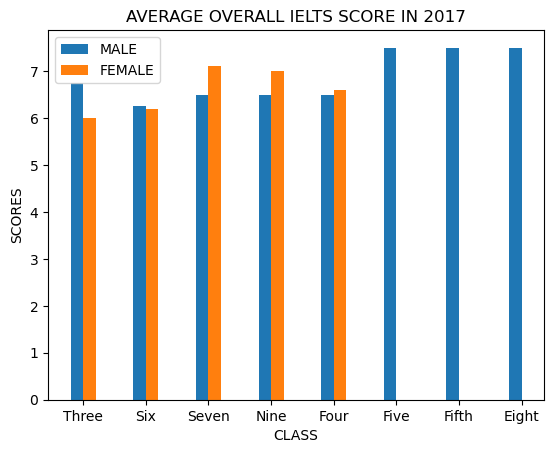

In [29]:
import numpy as np
import matplotlib.pyplot as plt

categories = dfbar['class']
values1 = dfbar['male_overall']
values2 = dfbar['female_overall']

bar_width = 0.20
x = np.arange(len(categories))

plt.bar(x - bar_width/2, values1, bar_width, label='MALE')
plt.bar(x + bar_width/2, values2, bar_width, label='FEMALE')

plt.xlabel('CLASS')
plt.ylabel('SCORES')
plt.title('AVERAGE OVERALL IELTS SCORE IN 2017')

plt.xticks(x, categories)
plt.legend()
plt.show()

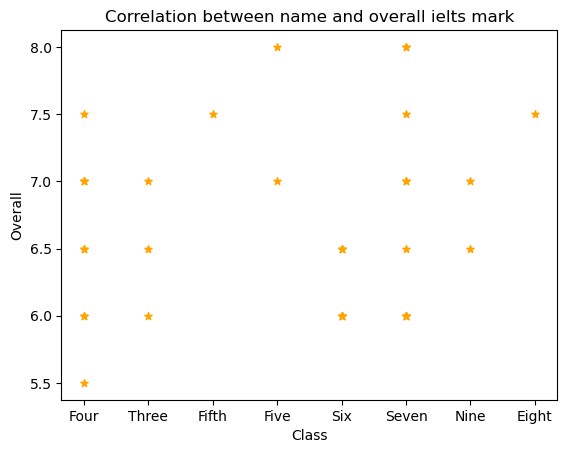

In [30]:
dfscatters=df[['class','overall']]
plt.scatter(dfscatters['class'], dfscatters['overall'], color='orange', s=30, marker='*')

plt.ylabel("Overall")
plt.xlabel("Class")
plt.title("Correlation between name and overall ielts mark")
plt.show()

In [33]:
import plotly.express as px

fig = px.pie(values = dfpie['count_mem'],
             names = dfpie['overall']
             color = ['6','6.5','7','7.5','8','5.5']
             color_discrete_map = {'6': '#ff9999',
                                   '6.5': '#66b3ff',
                                   '7': '#99ff99', 
                                   '7.5': '#ffcc99',
                                    '8': '#c2c2f0',
                                   '5.5': '#ffb3e6'})
fig.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2187260669.py, line 4)

In [34]:
import plotly.express as px

fig = px.pie(values = [20, 50, 37, 18],
             names = ['G1', 'G2', 'G3', 'G4'],
             color = ['G1', 'G2', 'G3', 'G4'],
             color_discrete_map = {'G1': '#30BFDD',
                                   'G2': '#8690FF',
                                   'G3': '#ACD0F4', 
                                   'G4': '#F7C0BB'})

fig.show() 
 
 
 
 


In [ ]:
import matplotlib.dates as mdates

x=dfplt['month']
ywrite=dfplt['w_avg']
yread=dfplt['r_avg']
ylisten=dfplt['l_avg']
yspeak=dfplt['s_avg']

plt.plot(x,ywrite,'-r',label='w_avg')
plt.plot(x,yread,':k',label='r_avg')
plt.plot(x,ylisten,'--b',label='l_avg')
plt.plot(x,yspeak,'*g-',label='s_avg')

plt.xlabel('Month')
plt.ylabel('Score')
plt.title('Score in month')
plt.legend()
plt.show()